# Meningtis: Are You at Risk?

- Mark Ilodigwe & Sophia Albano
- Professor Gideon Gogovi 
- BSTA101

## Packages/Modules

In [1]:
#Imported for data wrangling
#Reading in our data and performing necessary transformations and wrangling 
import pandas as pd
import numpy as np

#Used for plotting mechanisms for imputation,and balance purpose during EDA (Exploratory data analysis 
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

#Utilized this code for generating normal curve to view attribute distributions
from scipy.stats import norm
import statistics

#Used for Logistic Regression Model (LRM) for binary classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


#For model evaluation
from sklearn.metrics import confusion_matrix

from sklearn.metrics import accuracy_score, classification_report
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay

#Ignore Warnings
import warnings
warnings.filterwarnings("ignore")


#Used for Support Vector Machines (SVM) for binary classification
from sklearn.svm import SVC

In [2]:
!pip install xlrd

## Data Information

**Data Cited:**

https://hbiostat.org/data/

- INSTER Source data is thoroughly explained (who collected it, why was it collected,
when was it collected, think about any peculiarities of the data such as
missing values or quirks of collection.)

## Part 1: Cleaning and Exploratory Data Analysis

In [3]:
#Loading the data
mening_df = pd.read_excel("abm.xls", engine='xlrd')

*** No CODEPAGE record, no encoding_override: will use 'iso-8859-1'


In [4]:
mening_df.head()

,casenum,year,month,age,race,sex,dx,priordx,priorrx,wbc,...,pr2,reds2,whites2,polys2,lymphs2,monos2,others2,sumbands,subset,abm
0,1,78.0,1.0,4.0,black,female,1.0,0.0,0.0,6.5,...,46.0,1.0,47.0,0.0,100.0,0.0,0.0,2.000000,test,1.0
1,2,78.0,12.0,1.0,black,male,1.0,0.0,0.0,3.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.099000,training,1.0
2,3,78.0,3.0,0.8,black,male,0.0,1.0,1.0,NaN,...,51.0,335.0,230.0,0.0,100.0,0.0,0.0,NaN,test,NaN
3,4,78.0,8.0,54.0,black,male,6.0,2.0,0.0,7.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.108999,training,1.0
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,test,0.0


In [5]:
#Checking for null values in any variable
print(mening_df.isnull().sum())

casenum       0
year         72
month        81
age          81
race         85
sex          81
dx           83
priordx     113
priorrx     108
wbc         141
pmn         146
bands       153
compns      295
daysrx      321
offrx       409
lptodc      414
lpgap       438
morelabs    483
bloodgl     258
gl          129
pr          249
reds        271
whites      101
polys       132
lymphs      162
monos       165
others      164
gram        313
culture     307
cie         509
bloodclt    434
bloodgl2    459
gl2         313
pr2         358
reds2       331
whites2     274
polys2      305
lymphs2     310
monos2      314
others2     316
sumbands    416
subset        0
abm          80
dtype: int64


In [6]:
#Generating descriptive statistics
mening_df.describe()

,casenum,year,month,age,dx,priordx,priorrx,wbc,pmn,bands,...,gl2,pr2,reds2,whites2,polys2,lymphs2,monos2,others2,sumbands,abm
count,581.000000,509.000000,500.000000,500.000000,498.000000,468.000000,473.000000,440.000000,435.000000,428.000000,...,268.00000,223.000000,250.000000,307.000000,276.000000,271.000000,267.000000,265.000000,165.000000,501.000000
mean,291.000000,74.459725,6.626000,13.655400,2.580321,0.728632,0.323467,13.857726,63.303448,6.682243,...,59.83209,52.349776,1131.336000,114.983713,13.692029,83.166052,4.561798,0.822642,3.905133,0.433134
std,167.864529,3.108416,3.204788,19.693148,1.849078,1.519704,0.468295,8.531924,19.635500,10.632986,...,15.66927,48.658523,4711.231643,185.854685,24.628500,27.191742,31.237613,5.957763,9.492108,0.496004
min,1.000000,68.000000,1.000000,0.100000,0.000000,0.000000,0.000000,0.600000,0.000000,0.000000,...,16.00000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,146.000000,72.000000,4.000000,0.600000,1.000000,0.000000,0.000000,8.299999,52.000000,0.000000,...,50.00000,26.000000,2.000000,8.500000,0.000000,78.000000,0.000000,0.000000,0.000000,0.000000
50%,291.000000,75.000000,7.000000,3.000000,2.500000,0.000000,0.000000,12.000000,67.000000,2.000000,...,58.00000,38.000000,15.000000,41.000000,1.000000,97.000000,0.000000,0.000000,0.870000,0.000000
75%,436.000000,78.000000,9.000000,20.250000,4.000000,1.000000,1.000000,17.024998,78.000000,8.000000,...,67.25000,64.000000,201.500000,147.500000,16.250000,100.000000,0.000000,0.000000,4.740000,1.000000
max,581.000000,80.000000,12.000000,85.000000,6.000000,12.000000,1.000000,72.399994,96.000000,66.000000,...,130.00000,552.000000,44700.000000,1405.000000,100.000000,100.000000,476.000000,76.000000,110.598999,1.000000


In [7]:
#Some columns have minimum values of 0
mening_df.columns

Index(['casenum', 'year', 'month', 'age', 'race', 'sex', 'dx', 'priordx',
       'priorrx', 'wbc', 'pmn', 'bands', 'compns', 'daysrx', 'offrx', 'lptodc',
       'lpgap', 'morelabs', 'bloodgl', 'gl', 'pr', 'reds', 'whites', 'polys',
       'lymphs', 'monos', 'others', 'gram', 'culture', 'cie', 'bloodclt',
       'bloodgl2', 'gl2', 'pr2', 'reds2', 'whites2', 'polys2', 'lymphs2',
       'monos2', 'others2', 'sumbands', 'subset', 'abm'],
      dtype='object')

In [8]:
#Replacing these 0s with NaN
#Here it was necessary to exclude ABM as we NEED to keep zeros the way they are 
mening_df[['casenum', 'year', 'month', 'age', 'race', 'sex', 'dx', 'priordx',
       'priorrx', 'wbc', 'pmn', 'bands', 'compns', 'daysrx', 'offrx', 'lptodc',
       'lpgap', 'morelabs', 'bloodgl', 'gl', 'pr', 'reds', 'whites', 'polys',
       'lymphs', 'monos', 'others', 'gram', 'culture', 'cie', 'bloodclt',
       'bloodgl2', 'gl2', 'pr2', 'reds2', 'whites2', 'polys2', 'lymphs2',
       'monos2', 'others2', 'sumbands', 'subset']].replace(0,np.nan,inplace=True)
#Checking replacement
mening_df

,casenum,year,month,age,race,sex,dx,priordx,priorrx,wbc,...,pr2,reds2,whites2,polys2,lymphs2,monos2,others2,sumbands,subset,abm
0,1,78.0,1.0,4.0,black,female,1.0,0.0,0.0,6.500000,...,46.0,1.0,47.0,0.0,100.0,0.0,0.0,2.000000,test,1.0
1,2,78.0,12.0,1.0,black,male,1.0,0.0,0.0,3.700000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.099000,training,1.0
2,3,78.0,3.0,0.8,black,male,0.0,1.0,1.0,NaN,...,51.0,335.0,230.0,0.0,100.0,0.0,0.0,NaN,test,NaN
3,4,78.0,8.0,54.0,black,male,6.0,2.0,0.0,7.500000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.108999,training,1.0
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,test,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
576,577,70.0,7.0,2.0,black,female,3.0,0.0,0.0,4.900000,...,NaN,NaN,6.0,0.0,100.0,0.0,0.0,NaN,test,1.0
577,578,70.0,7.0,23.0,black,male,4.0,0.0,0.0,10.599999,...,NaN,0.0,332.0,0.0,100.0,0.0,0.0,NaN,training,0.0
578,579,70.0,8.0,8.0,black,male,4.0,0.0,0.0,15.099999,...,NaN,NaN,28.0,0.0,100.0,0.0,0.0,NaN,test,0.0
579,580,70.0,7.0,1.0,black,female,0.0,0.0,1.0,11.599999,...,22.0,NaN,5.0,0.0,100.0,0.0,0.0,NaN,training,NaN


In [9]:
#Counting the NaN values
print(mening_df.isnull().sum())

casenum       0
year         72
month        81
age          81
race         85
sex          81
dx           83
priordx     113
priorrx     108
wbc         141
pmn         146
bands       153
compns      295
daysrx      321
offrx       409
lptodc      414
lpgap       438
morelabs    483
bloodgl     258
gl          129
pr          249
reds        271
whites      101
polys       132
lymphs      162
monos       165
others      164
gram        313
culture     307
cie         509
bloodclt    434
bloodgl2    459
gl2         313
pr2         358
reds2       331
whites2     274
polys2      305
lymphs2     310
monos2      314
others2     316
sumbands    416
subset        0
abm          80
dtype: int64


#### Observations:
+ In a dataset with 581 rows and 43 columns, we decided that there was no need to use specific columns that had over 290 missing values, which we determined to be about half the dataset.

  + We were immediately able to determine that these columns should be dropped as they provide minial insights:
    - offrx, lptdoc, lpgap, morelabs, compns, daysrx, gram, culture, cie, bloodclt, bloodgl2, gl2, pr2, reds2, whites2, polys2, lymphs2, monos2, others2, sumbands.
    - Some variables that may be relevance in the context of our research question may be gram and culture. However, these variables have a qualitative nature, which would make them invaluable to our model.
    - Other variables were retained to evalutate for imputation purposes.

 - In general, dropping a column (feature) or not does not only depend on how many missing values there are in a column, but also if this column is useful for your task.



In [10]:
# Reasoning: https://datascience.stackexchange.com/questions/124442/dropping-dataframe-columns-with-missing-values
#Dropping invaluable columns
drop_columns = ['offrx', 'lptodc', 'lpgap', 'morelabs', 'compns', 'daysrx', 'gram', 'culture', 'cie', 'bloodclt', 'bloodgl2', 'gl2', 'pr2', 'reds2', 'whites2', 'polys2', 'lymphs2', 'monos2', 'others2', 'sumbands','subset']
mening_df.drop(columns = drop_columns, axis=1, inplace=True)
mening_df

,casenum,year,month,age,race,sex,dx,priordx,priorrx,wbc,...,bloodgl,gl,pr,reds,whites,polys,lymphs,monos,others,abm
0,1,78.0,1.0,4.0,black,female,1.0,0.0,0.0,6.500000,...,165.0,3.0,304.0,440.0,4000.0,100.0,0.0,0.0,0.0,1.0
1,2,78.0,12.0,1.0,black,male,1.0,0.0,0.0,3.700000,...,150.0,92.0,NaN,450.0,5490.0,97.0,3.0,0.0,0.0,1.0
2,3,78.0,3.0,0.8,black,male,0.0,1.0,1.0,NaN,...,183.0,36.0,NaN,0.0,4500.0,100.0,0.0,0.0,0.0,NaN
3,4,78.0,8.0,54.0,black,male,6.0,2.0,0.0,7.500000,...,NaN,52.0,43.0,27.0,0.0,NaN,NaN,NaN,NaN,1.0
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
576,577,70.0,7.0,2.0,black,female,3.0,0.0,0.0,4.900000,...,NaN,85.0,18.0,NaN,100.0,90.0,10.0,0.0,0.0,1.0
577,578,70.0,7.0,23.0,black,male,4.0,0.0,0.0,10.599999,...,NaN,84.0,32.0,44.0,242.0,4.0,96.0,0.0,0.0,0.0
578,579,70.0,8.0,8.0,black,male,4.0,0.0,0.0,15.099999,...,140.0,95.0,NaN,5.0,69.0,88.0,12.0,0.0,0.0,0.0
579,580,70.0,7.0,1.0,black,female,0.0,0.0,1.0,11.599999,...,NaN,73.0,NaN,NaN,240.0,50.0,50.0,0.0,0.0,NaN


## Columns Relevant for Feature Exploration
- In our background research for our project, we read a scientific article that explored the difficulty in intepreting white blood cell (WBC) counts in cerebrospinal fluid which complicates the complete diagnosis of meningitis.
   + To remedy such difficulties, red blood cells counts (RBC) are used as a refernece point for correction factors. In other words, adjust WBC levels according to RBC levels helps diagnostisc confirmation
        - As  a result, the features WBC, Reds, and Whites are features we must keep.
    




**Citation:**
García-De la Rosa, G., De Las Heras-Flórez, S., Rodríguez-Afonso, J., & Carretero-Pérez, M. (2022, August 16). Interpretation of white blood cell counts in the cerebrospinal fluid of neonates with traumatic lumbar puncture: A retrospective cohort study. BMC pediatrics. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9380374/ 


______

- Bacterial meningitis results in low glucose and high protein levels in cerebrospinal fluid. Typically, patients who are presumed to have ABM, receive a lumbar puncture to obtain a cerebrospinal fluid sample (CSF). In this fluid, CSF glucose levels are dependent on circulating serum glucose levels, as the serum glucose ratio is noted to be a reliable parameter or predictors of ABM. This is additional reasoning as to why the features "pr", "gl", and "bloodgl" are among those that have been retained. 


**Citation**
Runde, T. J. (2023, August 8). Bacterial meningitis. StatPearls [Internet]. https://www.ncbi.nlm.nih.gov/books/NBK470351/ 

An **important observation** about the dataset is that age values are in years, so values <1 can be calculated into months. This is critical to note as we are looking at data pertaining to children's health.

For example, an age of 0.8 in the data is a child of 9.6 months of age.

## Plots: Age vs Year: Hue as Race or Sex

<Axes: xlabel='year', ylabel='age'>

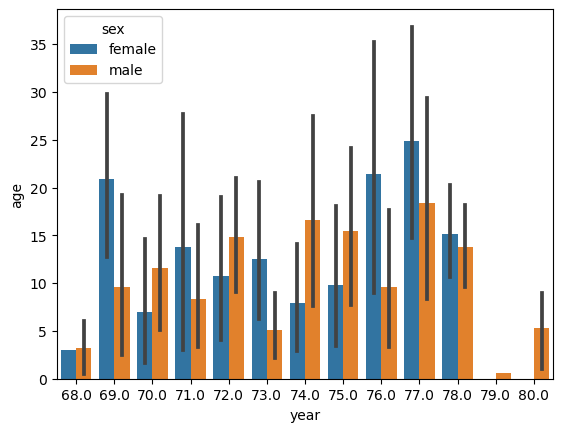

In [11]:

sns.barplot(x='year', y='age', hue='sex', data=mening_df)

On average, females seem to have higher age values (age of bacterial meningitis) as years go on. 


<Axes: xlabel='year', ylabel='age'>

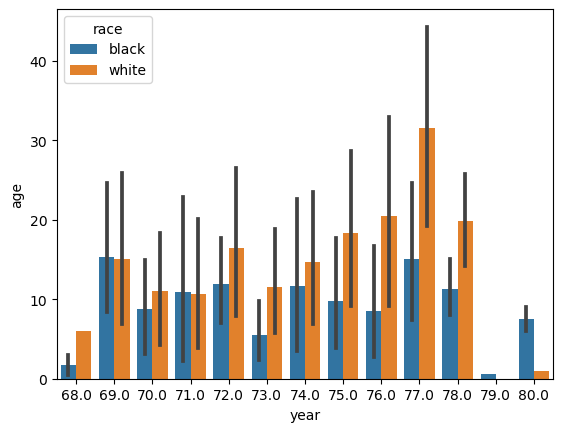

In [12]:
sns.barplot(x='year', y='age', hue='race', data=mening_df)

On average,  white seems to have higher age values (age of ABM) as years go on. 

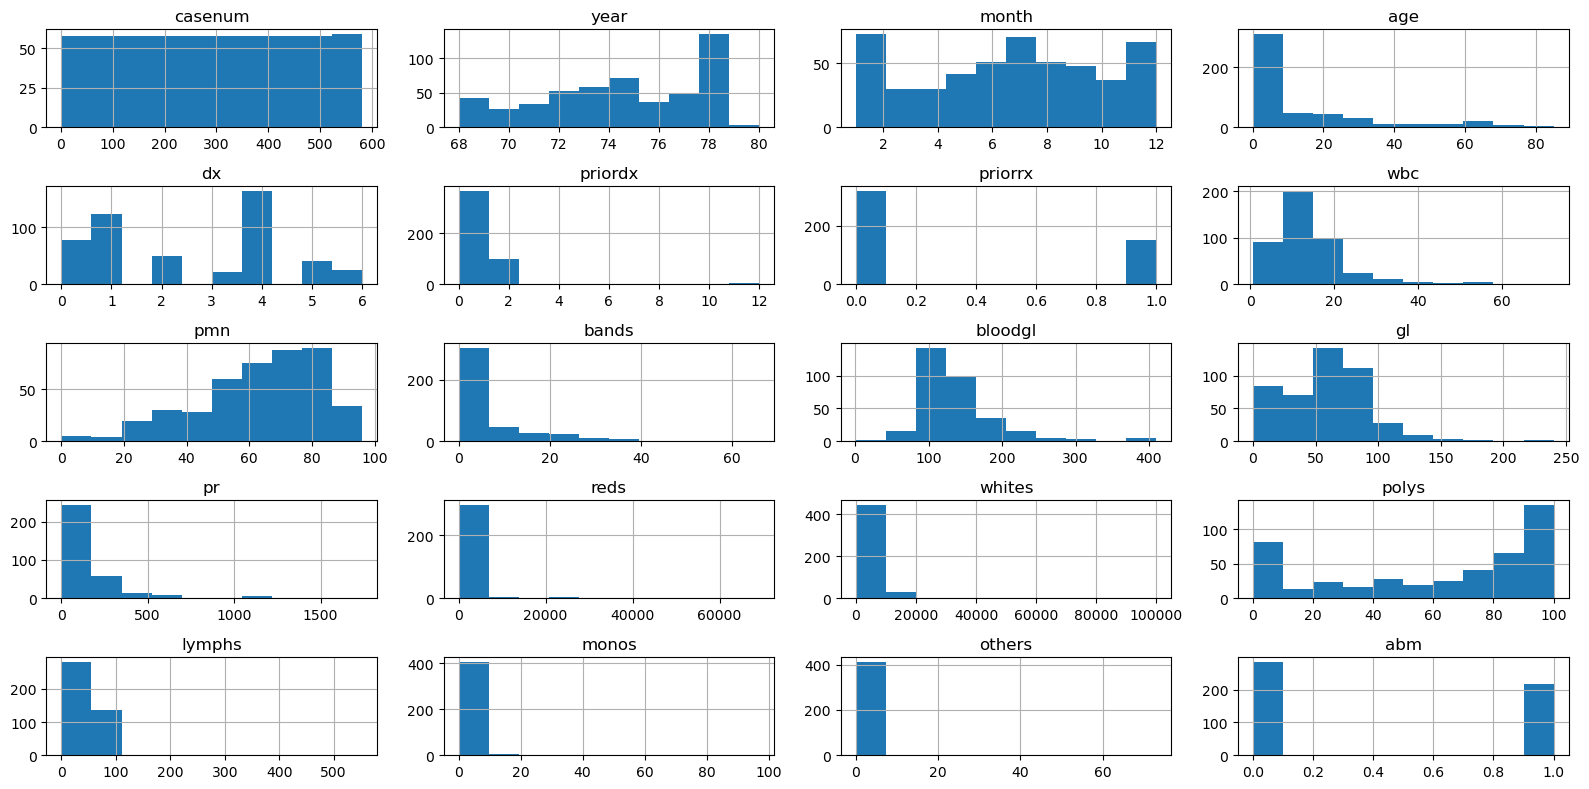

In [13]:
#Looking at the distribution of each attribute (23) with Matplotlib:
#This will assist in imputation analysis below 
columns_histograms = mening_df.columns.tolist()
#Making histograms more visually appealing
mening_df[columns_histograms].hist(figsize=(16, 8))

plt.tight_layout()
plt.show()

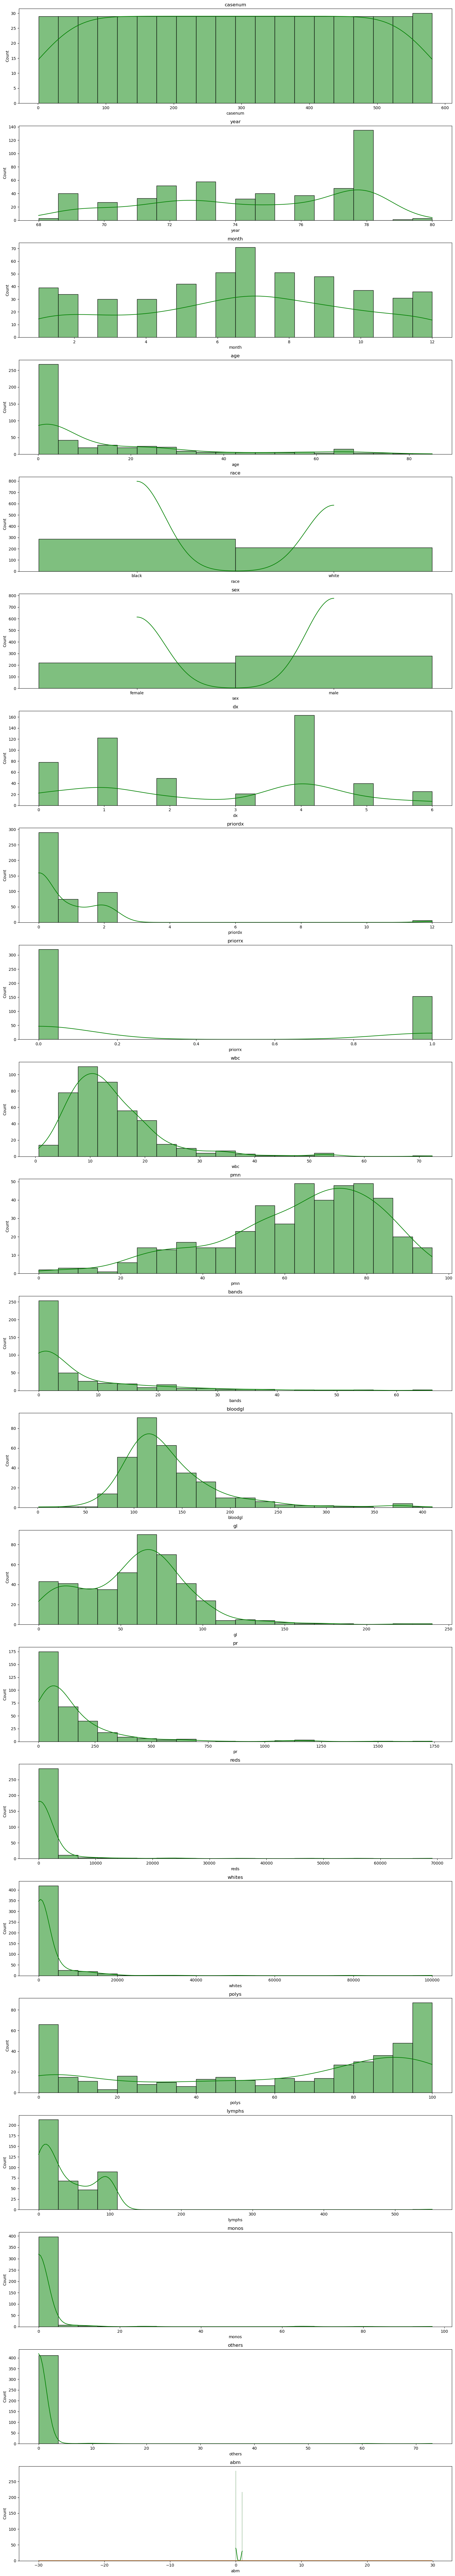

In [14]:
#Using Seaborn to view the distribution of each attribute

#Converting the array of columns to a list 
columns_histograms = mening_df.columns.tolist()

#Utilizing subplots to compile all plots into one code format. 
fig, axes = plt.subplots(nrows=len(columns_histograms), ncols=1, figsize=(16, 90)) #Increasing the second value of figsize led to greater visibility  

for i, column in enumerate(columns_histograms): #Enumerating with list allows for an iterative nature 
    sns.histplot(mening_df[column], kde=True, color="green", bins=20, ax=axes[i])
    axes[i].set_title(column) 

    #Adding a normal Curve to help view distribution of each attribute
    x_axis = np.arange(-30, 30, 0.1)
    mean = statistics.mean(x_axis)
    sd = statistics.stdev(x_axis)
    plt.plot(x_axis, norm.pdf(x_axis, mean, sd)) #In the form of a normal pdf 

plt.tight_layout() #Tight layout to allow for readability. 
plt.show()

## Analysis of Dataset Features, Next Steps for Imputation

* For the column's abm, age and year, we decided to drop the rows with NaN, as such data would be impossible to impute. When dropping, we were able to retain 22 rows which is still a substantial amount of data.


*We used the mean to impute NaNs in variables with a normal distribution.  The data for these attributes is centralled around the mean, so we used mean in the code to impute the missing values.  The shape of the distribution will not be affected due to using mean in  this imputation.

* Based on the scatter plots, WBC (white blood count), dx, priorrx, gl (glucose), and bloodgl (blood glucose) seemed to be the only variables with a somewhat normal distribution
    - As a result, we used imputation of the mean for any NaN values in these columns.


___

* We used the median to impute NaNs in variables with skewed distrubtitions in either the left or right direction. These variables are not normally distributed, as they have outliers.  Here, median is a better measure in imputation as it is less affected by outliers than mean is.  The median would be a be better measure of central tendency is this case. 

* For these other variables, we decided to impute with the median as the plots indicated a degree of skewness in either the left or right direction. The median would be a be better measure of central tendency is this case. 

____

## Imputation
#### Additonal Feature Cleaning
* Some of our variables would be irrelevant to a model train as they are qualitative features with the purpose of describing our data:
* They will not be included within our model. However, comments were made on their distributions
  + casenum
  + race
  + age
  + sex
  + month
  + year
Imputation Analysis 

* For the column's abm, age and year, we decided to drop the rows with NaN, as such data would be impossible to impute in the context of the research question.

 - When dropping, we were able to retain 419 rows which is still a substantial amount of data.



* Based on the scatter plots, WBC (white blood count), dx, priorrx, gl (CSF glucose), and bloodgl (blood glucose) seemed to be the only variables with a somewhat normal distribution
    - As a result, we used imputation of the mean for any NaN values in these columns.


___

* For other variables, we decided to impute with the median as the plots indicated a degree of skewness in either the left or right direction. The median would be a be better measure of central tendency is this case. 

_____
#### Final Feature Selections

* Our final feature selections are as follows:
  + dx
  + priordx
  + priorrx
  + wbc
  + pmn
  + bands
  + bloodgl
  + gl
  + pr
  + reds
  + whites
  + polys
  + lymphs
  + monos
  + others
* Our response selection is solely:
  + abm
  

## Imputation

In [15]:
#Dropping the rows with NaN values in ABM, Year, and Age as they are features that must be identifiable for each entry.
#our
mening_df.dropna(subset=['age', 'year','abm'], inplace=True)
#subset column label or sequence of labels, optional

In [16]:
#Getting rid of our qualitative features
#These will not be included in our model
mening_df.drop(['year', 'month', 'race', 'sex', 'casenum','age'],axis=1,inplace=True)
mening_df

,dx,priordx,priorrx,wbc,pmn,bands,bloodgl,gl,pr,reds,whites,polys,lymphs,monos,others,abm
0,1.0,0.0,0.0,6.500000,50.0,4.0,165.0,3.0,304.0,440.0,4000.0,100.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,3.700000,62.0,5.0,150.0,92.0,NaN,450.0,5490.0,97.0,3.0,0.0,0.0,1.0
3,6.0,2.0,0.0,7.500000,73.0,7.0,NaN,52.0,43.0,27.0,0.0,NaN,NaN,NaN,NaN,1.0
6,2.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16500.0,100.0,0.0,0.0,0.0,1.0
7,6.0,0.0,NaN,NaN,NaN,NaN,95.0,54.0,NaN,NaN,505.0,100.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
575,4.0,0.0,0.0,12.099999,74.0,1.0,110.0,60.0,37.0,329.0,121.0,80.0,20.0,0.0,0.0,0.0
576,3.0,0.0,0.0,4.900000,57.0,9.0,NaN,85.0,18.0,NaN,100.0,90.0,10.0,0.0,0.0,1.0
577,4.0,0.0,0.0,10.599999,70.0,2.0,NaN,84.0,32.0,44.0,242.0,4.0,96.0,0.0,0.0,0.0
578,4.0,0.0,0.0,15.099999,91.0,1.0,140.0,95.0,NaN,5.0,69.0,88.0,12.0,0.0,0.0,0.0


In [17]:
#Here we will impute the columns we wish to retain with the mean and median. 
#Such selections were made and discussed above in the imputation analysis 
mening_df.describe()

,dx,priordx,priorrx,wbc,pmn,bands,bloodgl,gl,pr,reds,whites,polys,lymphs,monos,others,abm
count,419.000000,393.000000,397.000000,366.000000,362.000000,356.000000,266.000000,377.000000,281.000000,262.000000,402.000000,374.000000,348.000000,347.000000,348.000000,419.000000
mean,3.057279,0.631043,0.284635,13.183878,63.759669,6.730337,138.075188,58.847480,149.373665,1138.801527,2450.139303,58.500000,42.574713,1.377522,0.505747,0.517900
std,1.609352,1.279251,0.451810,8.478367,18.862830,10.599510,52.116578,34.462764,221.880854,5145.104237,7926.690889,36.544567,45.862753,8.689497,5.189490,0.500277
min,1.000000,0.000000,0.000000,0.600000,6.000000,0.000000,35.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,8.000000,53.000000,0.000000,105.000000,35.000000,40.000000,4.000000,72.250000,21.250000,8.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,0.000000,11.299999,67.000000,2.000000,125.000000,62.000000,79.000000,21.500000,300.000000,74.500000,27.000000,0.000000,0.000000,1.000000
75%,4.000000,1.000000,1.000000,16.099991,78.000000,9.000000,155.000000,77.000000,170.000000,270.000000,1360.500000,90.000000,80.000000,0.000000,0.000000,1.000000
max,6.000000,12.000000,1.000000,72.399994,96.000000,66.000000,373.000000,240.000000,1740.000000,69100.000000,100000.000000,100.000000,552.000000,97.000000,73.000000,1.000000


In [18]:
#Imputing NaNs using the mean and median (made based on the relative use and distribution of features)
mening_df.columns

#Using mean for imputation
mening_df['wbc'].fillna(mening_df['wbc'].mean(), inplace=True)
mening_df['bloodgl'].fillna(mening_df['bloodgl'].mean(), inplace=True)
mening_df['dx'].fillna(mening_df['dx'].mean(), inplace=True)
mening_df['gl'].fillna(mening_df['gl'].mean(), inplace=True)
mening_df['priorrx'].fillna(mening_df['priorrx'].mean(),inplace=True)

#Using median for imputation
mening_df['reds'].fillna(mening_df['reds'].median(),inplace=True)
mening_df['pr'].fillna(mening_df['pr'].median(), inplace=True)
mening_df['priordx'].fillna(mening_df['priordx'].median(), inplace=True)
mening_df['polys'].fillna(mening_df['polys'].median(), inplace=True)
mening_df['lymphs'].fillna(mening_df['lymphs'].median(), inplace=True)
mening_df['monos'].fillna(mening_df['monos'].median(), inplace=True)
mening_df['others'].fillna(mening_df['others'].median(), inplace=True)
mening_df['whites'].fillna(mening_df['whites'].median(), inplace=True)
mening_df['bands'].fillna(mening_df['bands'].median(), inplace=True)
mening_df['pmn'].fillna(mening_df['pmn'].median(), inplace=True)

## Final, Cleaned Data

In [19]:
#Final Data Set
mening_df.head(30)

,dx,priordx,priorrx,wbc,pmn,bands,bloodgl,gl,pr,reds,whites,polys,lymphs,monos,others,abm
0,1.0,0.0,0.000000,6.500000,50.0,4.0,165.000000,3.00000,304.0,440.0,4000.0,100.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.000000,3.700000,62.0,5.0,150.000000,92.00000,79.0,450.0,5490.0,97.0,3.0,0.0,0.0,1.0
3,6.0,2.0,0.000000,7.500000,73.0,7.0,138.075188,52.00000,43.0,27.0,0.0,74.5,27.0,0.0,0.0,1.0
6,2.0,0.0,0.000000,13.183878,67.0,2.0,138.075188,58.84748,79.0,21.5,16500.0,100.0,0.0,0.0,0.0,1.0
7,6.0,0.0,0.284635,13.183878,67.0,2.0,95.000000,54.00000,79.0,21.5,505.0,100.0,0.0,0.0,0.0,1.0
12,1.0,1.0,0.000000,13.183878,67.0,2.0,164.000000,36.00000,79.0,56.0,721.0,41.0,59.0,0.0,0.0,1.0
13,1.0,0.0,0.000000,13.183878,67.0,2.0,138.075188,2.00000,42.0,21.5,1640.0,83.0,17.0,0.0,0.0,1.0
14,1.0,1.0,0.000000,13.183878,67.0,2.0,145.000000,80.00000,79.0,21.5,3.0,0.0,100.0,0.0,0.0,1.0
15,1.0,0.0,0.000000,13.183878,67.0,2.0,138.075188,140.00000,200.0,21.5,300.0,74.5,27.0,0.0,0.0,1.0
16,1.0,0.0,0.000000,13.183878,67.0,2.0,138.075188,30.00000,79.0,3660.0,13680.0,94.0,6.0,0.0,0.0,1.0


## Checking for Balance of Data

<Axes: xlabel='abm', ylabel='count'>

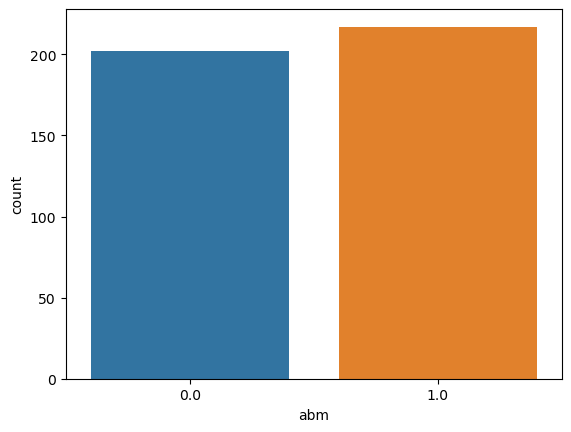

In [20]:
#Checking the balance of our data is essential when attempting to draw insights on accuracy at the end of our report
#We decided to do this with countplots 
sns.countplot(data=mening_df, x=mening_df['abm'])

#Here we can clearly observed that even after NAN values were dropped, our data appears to be balanced. 
#In this case, accuracy will be a feasible metric 

Checking the balance of our data is essential when attempting to draw insights on accuracy at the end of our report. We decided to do this with countplots. Here, it is observable that after imputation, our data is overall balanced.

Since the data appears to be balanced, we are able to use accuracy as a feasible metric to assess the predictability of our LRM/assess its performance.

If the data was not balanced, we would not use accuracy to assess our model's predictability.

## Part 2: Model Training (Comparative Analysis)


To answer our research question, we decided to do a comparative analysis for binary classification of meningitis

First, we chose to employ logistic regression to perfrom binary classification to predict wehther an unknown patient is at risk of getting acute bacterial meningitis (ABM) based on their characteristics.

Logistic regression is a statistical method used to predict the outcome of a categorical dependent variable, in this case ABM, based on a set of independent variables. 

Utilizing a probability function to determine whether or not the result is "yes" or "no" or in the context of our research question, with or without meningitis.

In logistic regression, the dependent variable is binary (AMB values are 0 and 1, indicating disease present or not) and
it is used to predict or calculate the probability of an outcome such as disease occurance.

## Logistic Regression Model Evaluation

In [21]:
#Splitting dataset into features (X) and class (y)

#X includes the removal of abm and our qualitative features
X = mening_df.drop(["abm"], axis=1)
#Y is our response/class variable for binary classification 
y = mening_df["abm"]

In [22]:
#To see 5 accuracy values for LRM
lgr_f1=[]
def LGR(X, y,f1):
    accuracy_values=[]
    state=1;
    for i in range(5):
        print("Random state: ", state)
        #Using i to use a different train-test split each of the 5 times
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = state)
    
    ##Training
        lgR = LogisticRegression(max_iter = 5000)
        lgR.fit(X_train, y_train)
    
        #Predictions
        predictionslgr = lgR.predict(X_test)
     
        #Calculating accuracy and appending
        accuracy=accuracy_score(y_test, predictionslgr)
        print(f"Accuracy for iteration {i+1}: {accuracy:.2f}")
    
        #Classification report
        print(f"Classification Report {i+1}:")
        print(classification_report(y_test, predictionslgr))
        report=classification_report(y_test, predictionslgr,output_dict=True)
        std_dev_accuracy = np.std(accuracy_values)
        state=state+11
        f1_score=report['macro avg']['f1-score']
        f1.append(f1_score)


    return f1


LGR(X,y,lgr_f1)




Random state:  1
Accuracy for iteration 1: 0.93
Classification Report 1:
              precision    recall  f1-score   support

         0.0       0.88      0.96      0.92        52
         1.0       0.97      0.91      0.94        74

    accuracy                           0.93       126
   macro avg       0.92      0.93      0.93       126
weighted avg       0.93      0.93      0.93       126

Random state:  12
Accuracy for iteration 2: 0.94
Classification Report 2:
              precision    recall  f1-score   support

         0.0       0.92      0.95      0.93        58
         1.0       0.95      0.93      0.94        68

    accuracy                           0.94       126
   macro avg       0.94      0.94      0.94       126
weighted avg       0.94      0.94      0.94       126

Random state:  23
Accuracy for iteration 3: 0.88
Classification Report 3:
              precision    recall  f1-score   support

         0.0       0.87      0.88      0.88        60
         1.0    

[0.9272470648617437,
 0.9362509486465975,
 0.8807646205286732,
 0.9041582150101419,
 0.8808848553601815]

In [23]:
#Accuracy values
accuracy_values = [0.88, 0.90, 0.88, 0.94, 0.93]
#Calculating standard devation of accuracy values
std_accuracy = np.std(accuracy_values)
print("Standard Deviation of Accuracy for LRM:", f"{std_accuracy:.4f}")

lgr_mean_accuracy = np.mean(accuracy_values)
print("Mean of Accuracy for LRM:", f"{lgr_mean_accuracy:.4f}")






lgr_f1_accuracy = np.std(lgr_f1)
print("Standard Deviation of F1 for LRM:", f"{lgr_f1_accuracy:.4f}")

mean_lgr_f1_accuracy = np.mean(lgr_f1)
print("Mean of F1 for LRM:", f"{mean_lgr_f1_accuracy:.4f}")


Standard Deviation of Accuracy for LRM: 0.0250
Mean of Accuracy for LRM: 0.9060
Standard Deviation of F1 for LRM: 0.0230
Mean of F1 for LRM: 0.9059


### Random State 42 LGR: 
Here we chose the traditional random state of 42 to model with a confusion matrix.

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [25]:
#Training 
lgR = LogisticRegression()
lgR.fit(X_train, y_train)

LogisticRegression()

In [26]:
#Predictions 
predictionslgr = lgR.predict(X_test)

In [27]:
print(classification_report(y_test, predictionslgr))

              precision    recall  f1-score   support

         0.0       0.89      0.86      0.88        57
         1.0       0.89      0.91      0.90        69

    accuracy                           0.89       126
   macro avg       0.89      0.89      0.89       126
weighted avg       0.89      0.89      0.89       126



In [28]:
#Checking the confusion metrics
#This will not run unless import is done in the same cell 
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, predictionslgr)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[49  8]
 [ 6 63]]


True Negatives (TN): 65 instances were correctly predicted as negative for meningitis.

True Positive (TP): 53 instances were correctly predicted as positive for meningitis.

False Positives (FP): 4 instances were incorrectly predicted as positive for meningitis.

False Negatvies (FN): 4 instances were incorrectly predicted as negative for meningitis.

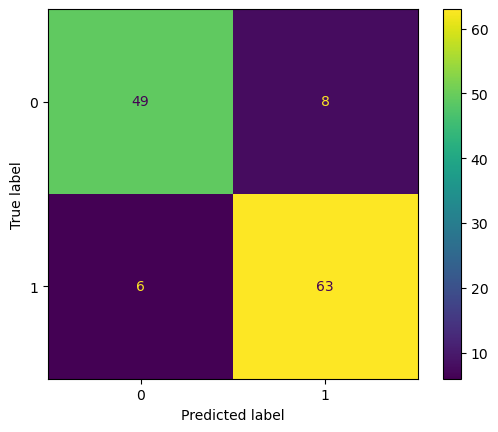

In [29]:
confusion_matrix = metrics.confusion_matrix(y_test, predictionslgr)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()

## Summary of Findings for LRM

Accuracy is a good metric to assess the performance of this model since the data is balanced. Accuracy for our Linear Regression model was 0.9060 **+/-** 0.0250.

## Support Vector Machine (SVM)

In [30]:
#New split for our support vector machine 

X1=mening_df.drop(['abm'],axis=1)

y1=mening_df['abm']

In [31]:
#To see 5 accuracy values for SVM
f1=[]
def SVM(X1,y1,f1):
    
    accuracy_values=[]
    state=1
    for i in range(5):
        print("Random state: ", state)
    #Using i to use a different train-test split each of the 5 times
        X1_train, X1_test, y1_train, y1_test=train_test_split(X1,np.ravel(y1),test_size = 0.30,random_state = state)
    
    #Instantiate and train the model
        model = SVC()
        model.fit(X1_train, y1_train)
    
    #Calculating accuracy and appending
        accuracy= model.score(X1_test, y1_test)
        print(f"Accuracy for iteration {i+1}: {accuracy:.2f}")
    
    #Classification report
        svm_model_predictions = model.predict(X1_test)
        print(f"Classification Report {i+1}:")
        print(classification_report(y1_test, svm_model_predictions))
        report= classification_report(y1_test, svm_model_predictions,output_dict=True)
        std_dev_accuracy = np.std(accuracy_values)
        state=state+11
        f1_score=report['macro avg']['f1-score']
        f1.append(f1_score)



    return f1
SVM(X1,y1,f1)

Random state:  1
Accuracy for iteration 1: 0.63
Classification Report 1:
              precision    recall  f1-score   support

         0.0       0.53      0.98      0.68        52
         1.0       0.97      0.38      0.54        74

    accuracy                           0.63       126
   macro avg       0.75      0.68      0.61       126
weighted avg       0.78      0.63      0.60       126

Random state:  12
Accuracy for iteration 2: 0.72
Classification Report 2:
              precision    recall  f1-score   support

         0.0       0.63      0.97      0.76        58
         1.0       0.95      0.51      0.67        68

    accuracy                           0.72       126
   macro avg       0.79      0.74      0.71       126
weighted avg       0.80      0.72      0.71       126

Random state:  23
Accuracy for iteration 3: 0.67
Classification Report 3:
              precision    recall  f1-score   support

         0.0       0.60      0.90      0.72        60
         1.0    

[0.6141265393888056,
 0.7142857142857142,
 0.6541176470588236,
 0.6956521739130435,
 0.6922162804515746]

In [32]:
#Accuracy values
accuracy_values_svm = [0.71, 0.63, 0.70, 0.67, 0.72]
#Calculating standard devation of accuracy values
std_accuracy_svm = np.std(accuracy_values_svm)
print("Standard Deviation of Accuracy for SVM:", f"{std_accuracy_svm:.4f}")

accuracy_mean = np.mean(accuracy_values_svm)
print("Mean of Accuracy for SVM:", f"{accuracy_mean:.4f}")






std_f1_svm = np.std(f1)
print("Standard Deviation of F1 for SVM:", f"{std_f1_svm:.4f}")

svm_f1_mean = np.mean(f1)
print("Mean of F1 for SVM:", f"{svm_f1_mean:.4f}")

Standard Deviation of Accuracy for SVM: 0.0326
Mean of Accuracy for SVM: 0.6860
Standard Deviation of F1 for SVM: 0.0358
Mean of F1 for SVM: 0.6741


### Random State 42 SVM:
Here we chose the traditional random state of 42 to model with a confusion matrix:

In [33]:
X1_train, X1_test, y1_train, y1_test=train_test_split(X1,np.ravel(y1),test_size = 0.30,random_state = 42)

In [34]:
model = SVC() 
model.fit(X1_train, y1_train)

SVC()

In [35]:
#Classification report #Original Model 

predict_svm=model.predict(X1_test)


print(classification_report(y1_test,predict_svm)) 


              precision    recall  f1-score   support

         0.0       0.60      0.98      0.75        57
         1.0       0.97      0.46      0.63        69

    accuracy                           0.70       126
   macro avg       0.79      0.72      0.69       126
weighted avg       0.80      0.70      0.68       126



In [37]:
#This will not run unless import is done in the same cell 
from sklearn.metrics import confusion_matrix 
conf_matrix_two = confusion_matrix(y1_test, predict_svm)
print("Confusion Matrix:")
print(conf_matrix_two)

Confusion Matrix:
[[56  1]
 [37 32]]


True Negatives (TN): 56 instances were correctly predicted as negative for meningitis.

True Positive (TP): 32 instances were correctly predicted as positive for meningitis.

False Positives (FP): 1 instance was incorrectly predicted as positive for meningitis.

False Negatvies (FN): 37 instances were incorrectly predicted as negative for meningitis.

In [ ]:
confusion_matrix = metrics.confusion_matrix(y1_test, predict_svm)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()

## Summary of Findings for SVM

Accuracy is a good metric to assess the performance of this model since the data is balanced.  Accuracy for our Support vector machine was 0.6860 **+/-** 0.0326.







## Model Performance Assessment: LRM vs SVM

When comparing accuracy to assess which model has optimal performance in predicting whether an unknown patient is at risk of ABM based on their characteristics, we clearly see that LRM is a better predictor of ABM.


f1:


Given that the accuracy for our Linear Regression model was 0.9060 **+/-** 0.0250 and the for our Support vector machine was 0.6860 +/- 0.0326, we can conclude that the Linear Regression model performed better on unseen data based on its ability to predict whether an unseen patient would be at risk for meningitis or not. 




